In [1]:
import data_analysis_tools as da
def predict(alpha, beta, xi):
    return beta * xi + alpha

def error(alpha, beta, xi, yi):
    return yi - predict(alpha, beta, xi)

def sum_of_squared_errors(alpha, beta, x, y):
    errors = [error(alpha, beta, xi, yi) for xi, yi in zip(x, y)]
    return da.sum_of_squares(errors)


def least_squares_fit(x, y):
    beta = da.correlation(x, y) * da.standard_deviation(y) / da.standard_deviation(x)
    alpha = da.mean(y) - beta * da.mean(x)
    return alpha, beta


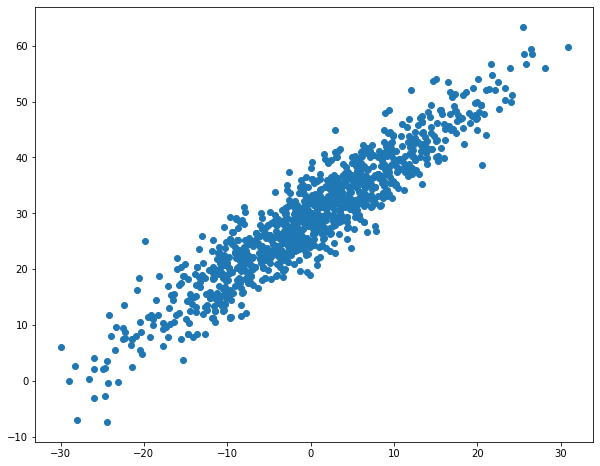

In [2]:
import matplotlib.pyplot as plt
xs = da.random.normal(0, 10, 1000)
ys = [int(da.random.normal(30, 4, 1)) + xi for xi in xs]


plt.figure(figsize=(10, 8))
plt.scatter(xs, ys)
plt.show()

In [3]:
alpha, beta = least_squares_fit(xs, ys)

print(f' alpha: {alpha}, beta: {beta} ')

 alpha: 29.259023348340737, beta: 1.0062607572331486 


In [4]:
predict(alpha, beta, 100)

129.8850990716556

In [5]:
def total_sum_of_squares(y):
    return sum(v ** 2 for v in da.de_mean(y))

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, xs, ys)

0.8692651913489224

In [6]:
# using the gradient descent
def squared_error(xi, yi, theta):
    alpha, beta = theta
    return error(alpha, beta, xi, yi) ** 2
    
def squared_error_gradient(xi, yi, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, xi, yi), -2 * error(alpha, beta, xi, yi) * xi]

da.r.seed(0)
theta = [da.random.random(), da.random.random()]

alpha, beta = da.minimize_stochastic(
    squared_error,
    squared_error_gradient,
    xs,
    ys,
    theta,
    0.0001
)

print(alpha, beta)

29.259903913111494 1.0063473890985446


In [1]:
# multiple regression
import data_analysis_tools as da

data = da.file_ops.read_csv('./files/hss.csv')
data

keys = ["Radio", "Social Media", "Influencer", "Sales"]
data = [(0.0 if data_i["Radio"] == "" else float(data_i["Radio"]), 
    0.0 if data_i["Social Media"] == "" else float(data_i["Social Media"]), 
    0 if data_i["Influencer"] == "Mega" else 1 if data_i["Influencer"] == "Micro" else 2 if data_i["Influencer"] == "Nano" else 3,
    0.0 if data_i["Sales"] == "" else float(data_i["Sales"])) 
    for data_i in data]

train, test = da.random.split_data(data, 0.2)

train_features = [(train_i[0], train_i[1], train_i[2]) for train_i in train]
train_labels = [train_i[3] for train_i in train]

test_features = [(test_i[0], test_i[1], test_i[2]) for test_i in test]
test_labels = [test_i[3] for test_i in test]

print(train_features[:5])
print(train_labels[:5])

[(31.35910881, 3.82809637, 0.0), (14.63163885, 0.635238342, 2.0), (17.42884965, 3.306706147, 3.0), (6.721845062, 1.367690472, 2.0), (9.099158632, 1.051392464, 1.0)]
[304.4568708, 156.8632685, 143.8359148, 82.43756501, 125.4867164]


In [9]:
train_data = []

for j in range(len(train[0])):
    col = []
    for i in range(len(train)):
        col.append(train[i][j])
    train_data.append(col)

In [6]:
def predict(xi, beta):
    return da.dot_product(xi, beta)

def error(xi, yi, beta):
    return yi - predict(xi, beta)

def squared_error(xi, yi, beta):
    return error(xi, yi, beta) ** 2

def squared_error_gradient(xi, yi, beta):
    return [-2 * xij * error(xi, yi, beta) for xij in xi]

def estimate_beta(x, y):
    beta_initial = [da.random.random() for xi in x[0]]
    return da.minimize_stochastic(squared_error,
        squared_error_gradient,
        x, y,
        beta_initial,
        0.001
    )

da.r.seed(0)
beta = estimate_beta(train_features, train_labels)
beta

[9.164596705067702, 2.1313176991322305, 8.33685691718669]

In [11]:
print(beta)

[9.224065782104267, 1.8858271157364084, 8.81176530495342]


In [12]:
test_index = 3
predicted = predict(test_features[test_index], beta)
actual = test_labels[test_index]

print(f' predicted: {predicted}, actual: {actual} ')

 predicted: 106.79195394935792, actual: 112.1928797 


In [13]:
for test_index in range(20):
    predicted = predict(test_features[test_index], beta)
    actual = test_labels[test_index]

    print(f' predicted: {predicted}, actual: {actual} ')

 predicted: 89.57769598085929, actual: 68.42501013 
 predicted: 200.91368078821682, actual: 110.2396605 
 predicted: 329.33829970178124, actual: 269.9524569 
 predicted: 106.79195394935792, actual: 112.1928797 
 predicted: 205.6157240841188, actual: 252.0522656 
 predicted: 24.569552406529233, actual: 44.02356801 
 predicted: 53.557360720477874, actual: 48.27654502 
 predicted: 17.665458436079756, actual: 43.06509252 
 predicted: 303.9192399417748, actual: 351.8656104 
 predicted: 456.4179865230295, actual: 355.1480811 
 predicted: 231.2248175748572, actual: 201.6903809 
 predicted: 96.55732154855868, actual: 139.7761666 
 predicted: 40.70733618057559, actual: 118.5082625 
 predicted: 265.5861632428515, actual: 240.4027581 
 predicted: 153.22273944030354, actual: 42.71995548 
 predicted: 186.925908872022, actual: 216.0789617 
 predicted: 370.37049043420126, actual: 301.4931202 
 predicted: 238.255052965192, actual: 272.4213353 
 predicted: 252.71860782210913, actual: 298.1843017 
 pred

In [14]:
def test_model(test_features, test_labels, allowed_error=0.25):
    """if actual + actual * (allowed_error / 2) > predicted > actual - actual * (allowed_error / 2): 
        correct += 1\n
        returns correct / total"""
    correct = 0
    total = len(test_labels)
    for feature, label in zip(test_features, test_labels):
        predicted = predict(feature, beta)
        actual = label

        
        if actual + actual * (allowed_error / 2) > predicted > actual - actual * (allowed_error / 2):
            correct += 1
        

    return correct / total

test_model(test_features, test_labels, allowed_error=0.4)

0.526775956284153

In [1]:
def multiple_r_squared(x, y, beta):
    sum_of_sq_errs = sum(error(xi, yi, beta) ** 2 for xi, yi in zip(x, y))
    return 1 - sum_of_sq_errs / total_sum_of_squares(y)

print('on train data:', multiple_r_squared(train_features, train_labels, beta))
print('on test data:', multiple_r_squared(test_features, test_labels, beta))

NameError: name 'train_features' is not defined

In [17]:
# digression, the bootstrap
def bootstrap_sample(xs, ys=None):
    if ys:
        length = len(ys)
        sample_index = da.random.rand_index(length)
        return xs[sample_index], ys[sample_index]
    else:
        return da.random.sample(xs)

        
def bootstrap_statistic(data, stats_fn, num_samples):
    try:
        xs, ys = zip(*data)
        samples = [bootstrap_sample(xs, ys) for _ in range(num_samples)]
    except:
        samples = [bootstrap_sample(data) for _ in range(num_samples)]

    return stats_fn(samples)

print('mean:', da.median(xs))
print('bootstrap mean:', bootstrap_statistic(xs, da.median, 10))

mean: 0.078533849326053
bootstrap mean: 0.897752244873701


In [18]:
def estimate_sample_beta(sample):
    x_sample, y_sample = list(zip(*sample))
    return estimate_beta(x_sample, y_sample)


bootstrap_betas = [bootstrap_statistic(zip(train_features, train_labels), estimate_sample_beta, 100)
    for _ in range(10)]
bootstrap_betas


[[9.377720059355587, 0.09837871909353879, 8.990221478981299],
 [9.143262089504601, -0.5600118351335212, 14.168856400632496],
 [9.565911864528136, 3.5074455381303116, 4.972839056177771],
 [8.895035386402723, 3.365473420166968, 9.110478952150038],
 [10.146716489791253, -2.2934732564061524, 6.58007660170788],
 [10.302110328213175, -1.0151878094025422, 4.887150545520789],
 [7.92612317258575, 8.118064577082995, 5.9420795347319295],
 [9.571651883133761, 0.14058712524695696, 13.022177094497975],
 [10.090706038483352, -2.1414753442956145, 7.265801475842672],
 [10.422139183857869, -3.5315079798444713, 11.59603930802728]]

In [19]:
bootstrap_standard_errors = [da.standard_deviation([beta[i] for beta in bootstrap_betas])
    for i in range(3)]

bootstrap_standard_errors

[0.7627566462421208, 3.495823502043639, 3.3299064108491443]

In [25]:
def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
        return 2 * (1 - da.random.normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * da.random.normal_cdf(beta_hat_j / sigma_hat_j)

print(p_value(10.4, 0.76))
print(p_value(-3.53, 3.49))
print(p_value(11.59, 3.32))

0.0
0.3117956860155432
0.0004812813591277276


In [30]:
# regularization
from functools import partial

def ridge_penalty(beta, alpha):
    return alpha * da.dot_product(beta[1:], beta[1:])

def squared_error_ridge(xi, yi, beta, alpha):
    return error(xi, yi, beta) ** 2 + ridge_penalty(beta, alpha)

def ridge_penalty_gradient(beta, alpha):
    """gradient of just the ridge penalty"""
    return [0] + [2 * alpha * beta_j for beta_j in beta[1:]]

def squared_error_ridge_gradient(x_i, y_i, beta, alpha):
    """the gradient corresponding to the ith squared error term
    including the ridge penalty"""
    return da.vector_add(squared_error_gradient(x_i, y_i, beta),
        ridge_penalty_gradient(beta, alpha))

def estimate_beta_ridge(x, y, alpha):
    """use gradient descent to fit a ridge regression
    with penalty alpha"""
    beta_initial = [da.random.random() for _ in x[0]]
    
    return da.minimize_stochastic(partial(squared_error_ridge, alpha=alpha),
        partial(squared_error_ridge_gradient,
        alpha=alpha),
        x, y,
        beta_initial,
        0.001)

da.r.seed(0)
beta_0 = estimate_beta_ridge(train_features, train_labels, alpha=0.1)

In [32]:
print(beta_0)
print(multiple_r_squared(train_features, train_labels, beta_0))

[9.25968812129979, 1.8556733208836498, 8.3389526159274]
0.7134121347898925


In [1]:
import data_analysis_tools as da

data = da.file_ops.read_csv('./files/hss.csv')
data

keys = ["Radio", "Social Media", "Influencer", "Sales"]
data = [(0.0 if data_i["Radio"] == "" else float(data_i["Radio"]), 
    0.0 if data_i["Social Media"] == "" else float(data_i["Social Media"]), 
    0 if data_i["Influencer"] == "Mega" else 1 if data_i["Influencer"] == "Micro" else 2 if data_i["Influencer"] == "Nano" else 3,
    0.0 if data_i["Sales"] == "" else float(data_i["Sales"])) 
    for data_i in data]

train, test = da.random.split_data(data, 0.2)

train_features = [(train_i[0], train_i[1], train_i[2]) for train_i in train]
train_labels = [train_i[3] for train_i in train]

test_features = [(test_i[0], test_i[1], test_i[2]) for test_i in test]
test_labels = [test_i[3] for test_i in test]

print(train_features[:5])
print(train_labels[:5])

[(16.82166633, 1.585219121, 1.0), (2.608126516, 2.573891358, 1.0), (27.29955891, 5.084324988, 1.0), (22.85140519, 0.667171404, 1.0), (24.40263571, 1.995127175, 3.0)]
[114.6695418, 42.18314566, 305.1819706, 221.5444894, 253.7082243]


In [2]:
import data_analysis_tools as da

classifier = da.ml.MultiLinearRegressionClassifier(0.001)
classifier.train(train_features, train_labels)
classifier.beta

[9.265138580617945, 2.1031455746939853, 7.465871308792405]

In [5]:
print('Actual', test_labels[1], 'Predicted:', classifier.predict(test_features[1]))

Actual 263.3750447 Predicted: 232.92616736236383


In [6]:
classifier.test(test_features, test_labels, 0.4)

0.7759562841530054

In [8]:
classifier.r_squared(test_features, test_labels)

0.7007085702080105